In [4]:
from pathlib import Path
import pandas as pd
import pyvista as pv
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt
from knee_stress_predict.config import raw_data_dir, processed_data_dir
from knee_stress_predict.objects.KneeGeometry import KneeGeometry

# FEATURE EVALUATION

This notebook evaluate initial features and based on that evaluation it cleans the data for linear regression model

Load data produced by patients_data_loading.ipynb notebook

In [13]:
data_set_name = "set_2"
file_path = Path.joinpath(processed_data_dir, data_set_name,  "out.csv")
result = pd.read_csv(file_path)
result

,Unnamed: 0,Code,Patella_PN,Femur_PN,Tibia_PN,Patella_Car_PN,Femur_Car_PN,Tibia_M_Car_PN,Tibia_L_Car_PN,Patella_volume,...,Tibia_M_Car_bounds_z,Tibia_L_Car_bounds_z,Max_dist_femur_tibia_lat_car,Min_dist_femur_tibia_lat_car,Mean_dist_femur_tibia_lat_car,Max_dist_femur_tibia_med_car,Min_dist_femur_tibia_med_car,Mean_dist_femur_tibia_med_car,Max_tib_lat_contact_pressure,Max_tib_med_contact_pressure
0,0,9905863M00,923,4011,3009,4745,19095,2840,2840,28699.200017,...,51.821435,38.669460,17.745715,2.039169,6.118655,12.363764,1.604390,4.737838,20.304403,21.124319
1,1,9905863M12,884,4110,2790,4585,19025,2840,2840,28197.827325,...,49.585413,39.525092,17.898652,1.921611,5.881292,11.342142,1.238408,4.577601,16.648224,24.434072
2,2,9908796M00,641,2861,2268,4120,20295,2840,2840,15222.439598,...,42.175751,34.364839,17.383859,1.526717,5.834900,11.786139,1.642169,4.761267,24.156282,32.353172
3,3,9908796M12,625,3022,2171,4715,19385,2840,2840,14931.893097,...,42.911019,33.854403,15.747611,1.651787,5.670845,9.728744,1.010164,4.052701,26.788031,41.688950
4,4,9912946M00,788,4137,2689,5575,21035,2840,2840,22692.085291,...,45.878323,53.532299,13.779237,1.205597,4.272830,20.666032,2.178122,6.670601,24.228903,16.497473
5,5,9912946M12,791,4298,2533,5685,20945,2840,2840,22884.798440,...,44.778685,54.848365,14.812026,1.317364,4.527756,20.625497,2.362209,6.585939,20.500221,16.258379
6,6,9954040M00,803,3417,2512,5015,20230,2840,2350,23008.003160,...,41.209505,50.400081,14.405036,1.791824,5.394328,19.520492,1.581902,6.630810,21.599136,23.253128
7,7,9954040M12,812,3233,2740,4885,20345,2840,2360,22994.325369,...,41.165844,50.319550,14.258336,1.599123,5.315656,20.528995,1.629729,6.670640,22.697514,22.974691
8,8,9958234M00,759,3696,2606,5235,21865,2840,2840,20235.363396,...,41.892000,50.649900,16.565555,1.481842,5.632349,19.478773,2.755818,7.313583,47.319096,18.733936
9,9,9958234M12,752,3674,2669,5225,22195,2840,2840,20204.268573,...,42.959333,49.449277,16.466665,1.677136,5.663880,20.177378,2.723724,7.444552,33.180820,18.182465


In [14]:
result.drop('Unnamed: 0', axis=1)

,Code,Patella_PN,Femur_PN,Tibia_PN,Patella_Car_PN,Femur_Car_PN,Tibia_M_Car_PN,Tibia_L_Car_PN,Patella_volume,Femur_volume,...,Tibia_M_Car_bounds_z,Tibia_L_Car_bounds_z,Max_dist_femur_tibia_lat_car,Min_dist_femur_tibia_lat_car,Mean_dist_femur_tibia_lat_car,Max_dist_femur_tibia_med_car,Min_dist_femur_tibia_med_car,Mean_dist_femur_tibia_med_car,Max_tib_lat_contact_pressure,Max_tib_med_contact_pressure
0,9905863M00,923,4011,3009,4745,19095,2840,2840,28699.200017,229006.314467,...,51.821435,38.669460,17.745715,2.039169,6.118655,12.363764,1.604390,4.737838,20.304403,21.124319
1,9905863M12,884,4110,2790,4585,19025,2840,2840,28197.827325,246641.112279,...,49.585413,39.525092,17.898652,1.921611,5.881292,11.342142,1.238408,4.577601,16.648224,24.434072
2,9908796M00,641,2861,2268,4120,20295,2840,2840,15222.439598,141352.763773,...,42.175751,34.364839,17.383859,1.526717,5.834900,11.786139,1.642169,4.761267,24.156282,32.353172
3,9908796M12,625,3022,2171,4715,19385,2840,2840,14931.893097,149215.886238,...,42.911019,33.854403,15.747611,1.651787,5.670845,9.728744,1.010164,4.052701,26.788031,41.688950
4,9912946M00,788,4137,2689,5575,21035,2840,2840,22692.085291,248976.459037,...,45.878323,53.532299,13.779237,1.205597,4.272830,20.666032,2.178122,6.670601,24.228903,16.497473
5,9912946M12,791,4298,2533,5685,20945,2840,2840,22884.798440,258760.708517,...,44.778685,54.848365,14.812026,1.317364,4.527756,20.625497,2.362209,6.585939,20.500221,16.258379
6,9954040M00,803,3417,2512,5015,20230,2840,2350,23008.003160,182608.626657,...,41.209505,50.400081,14.405036,1.791824,5.394328,19.520492,1.581902,6.630810,21.599136,23.253128
7,9954040M12,812,3233,2740,4885,20345,2840,2360,22994.325369,172181.530610,...,41.165844,50.319550,14.258336,1.599123,5.315656,20.528995,1.629729,6.670640,22.697514,22.974691
8,9958234M00,759,3696,2606,5235,21865,2840,2840,20235.363396,208302.746227,...,41.892000,50.649900,16.565555,1.481842,5.632349,19.478773,2.755818,7.313583,47.319096,18.733936
9,9958234M12,752,3674,2669,5225,22195,2840,2840,20204.268573,207124.042497,...,42.959333,49.449277,16.466665,1.677136,5.663880,20.177378,2.723724,7.444552,33.180820,18.182465


## Correlations between variables


C:\Users\nnina\AppData\Local\Temp\ipykernel_31340\1989281436.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(result.corr(), dtype=np.bool))


Text(0.5, 1.0, 'All patients Correlation Heatmap')

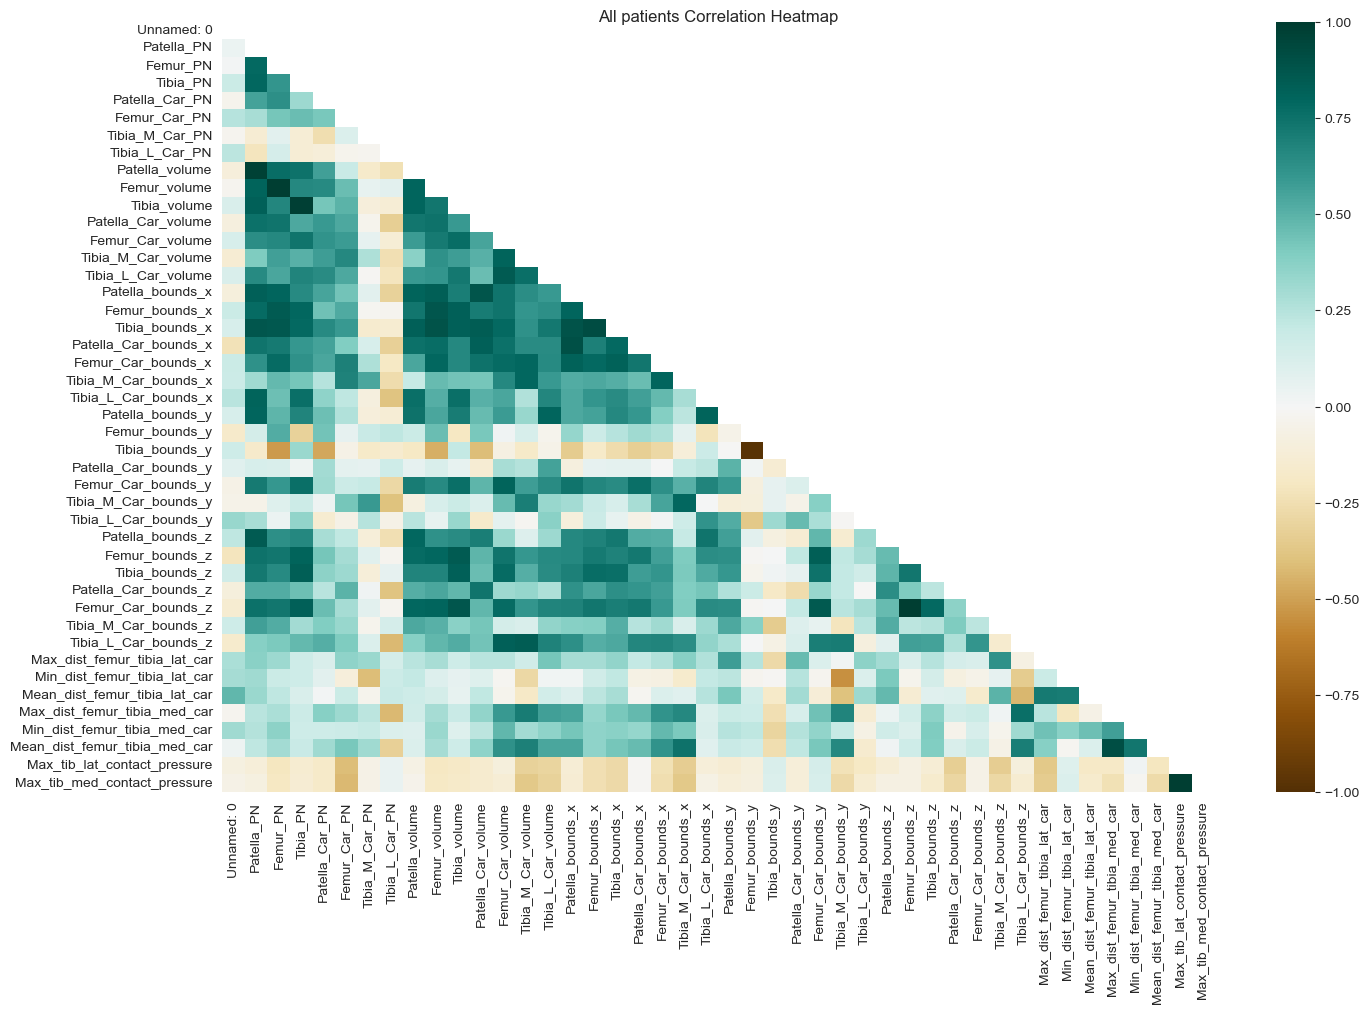

In [15]:
plt.figure(figsize=(16, 10))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(result.corr(), dtype=np.bool))
heatmap = sns.heatmap(result.corr(), mask=mask, vmin=-1, vmax=1, annot=False, cmap='BrBG')
heatmap.set_title('All patients Correlation Heatmap', fontdict={'fontsize':12}, pad=0)

Max_tib_med_contact_pressure and Max_tib_lat_contact_pressure are variables that we try to predict. They have a strong positive correlation with each other. Besides that, they are slightly correlated with Femur_Car_PN.
However, this data does not show any promising features that we can use for linear regression. Let's examine the distribution and see if it will give us some insight.
Additionally, on that correlation heat map, we can see that many features strongly correlate with each other. So we can minimize the number of features by combing correlated features or choosing one.